# Example 3 &ndash; Average of oscillations #

In this example, we reproduce figure 5 of the paper *The determining role of covariances in large networks of stochastic neurons*. For details on PopNet's functions, see the [documentation](https://vincentpainchaud.github.io/PopNet/) of the package.

In [1]:
import popnet as pn
import matplotlib.pyplot as plt
plt.ioff()

We start by defining a configuration with all parameters used in this example. For the code to run faster, we will run fewer stochastic simulations than in the paper (only 100).

In [2]:
excitators = pn.population('Excitators', size=100)
excitators.set_means(alpha=.75, beta=.15, gamma=1, theta=.7)
excitators.set_scales(theta=.2)

inhibitors = pn.population('Inhibitors', size=100)
inhibitors.set_means(alpha=.4, beta=.12, gamma=.5, theta=1.8)
inhibitors.set_scales(theta=.2)

net = pn.network('2A', (excitators, inhibitors))
net.c = [[11, -12], [12, -9]]
net.reset_parameters()

config = pn.config(net)

config.initial_state = .25, .3, .2, .25
config.set_covariances_from_expectations()
config.final_time = 100
config.delta = .1
config.executions = 100

Now, we integrate numerically both the mean-field system and the second-order system with PopNet's methods.

In [3]:
integrator = pn.get_integrator(config, 'mean-field')
integrator.run('ode')
mean_field = integrator.output()
integrator.close()

integrator = pn.get_integrator(config, 'extended')
integrator.run('ode')
solution = integrator.output()
integrator.close()

We also run stochastic simulations and compute statistics.

In [4]:
simulator = pn.get_simulator(config, act='step', mode='individual')
simulator.run()
trajectory = simulator.output()
simulator.close()

simulator = pn.get_simulator(config, act='step', mode='chain')
simulator.run(verbose=True)
stats = simulator.output()
simulator.close()

100%|█████████████████████████████████████████████████████████████| 100/100 [02:32<00:00,  1.53s/it]


Then, we define a Matplotlib figure on which we will draw the results.

In [5]:
def reorder_entries(L):
    return [L[0], L[3], L[1], L[4], L[2], L[5]]

def reordered_entries(result):
    handles, labels = result.ax.get_legend_handles_labels()
    return reorder_entries(handles), reorder_entries(labels)

preamble = ('\\usepackage{lmodern}'
            '\\usepackage{amssymb}'
            '\\usepackage{sansmath}'
            '\\sansmath')
cm = 1 / 2.54 #in/cm

fs = 8
hpad = .4
hlen = 1.4

fig, axes = pn.figure(subplots=(321, 322, 323, 324, 325, 326), figsize=(18*cm, 8.5*cm),
                      font_family='sans-serif', usetex=True, preamble=preamble, tight_layout=False)
fig.subplots_adjust(left=.038, right=.985, bottom=.09, top=.925, wspace=.05, hspace=.43)

mean_field.fig = solution.fig = stats.fig = trajectory.fig = fig

On the six subfigures, we successively plot the mean-field solution, the trajectory, the expectations of the fractions of each population in each state obtained from the dynamical system's solution, the corresponding averages obtained from the stochastic simulations, the variances obtained from the solution, and the sample variances obtained from the stochastic simulations.

In [6]:
mean_field.ax = axes[0]
mean_field.plot_expectations()
mean_field.setup(set_xlabel=False, fontsize=fs)
mean_field.ax.set_xticklabels([])
mean_field.ax.tick_params(labelsize=fs)
handles, labels = reordered_entries(mean_field)
mean_field.ax.legend(handles, labels, fontsize=fs, ncol=6, loc='lower left', bbox_to_anchor=(0, 1.05, 1, .1),
                     mode='expand', borderaxespad=0, handletextpad=hpad, handlelength=hlen)

In [7]:
trajectory.ax = axes[1]
trajectory.plot_fractions()
trajectory.setup(set_xlabel=False, fontsize=fs)
trajectory.ax.set_xticklabels([])
trajectory.ax.set_yticklabels([])
handles, labels = reordered_entries(trajectory)
trajectory.ax.legend(handles, labels, fontsize=fs, ncol=6, loc='lower left', bbox_to_anchor=(0, 1.05, 1, .1),
                     mode='expand', borderaxespad=0, handletextpad=hpad, handlelength=hlen)

In [8]:
solution.ax = axes[2]
solution.plot_expectations()
solution.setup(set_xlabel=False, fontsize=fs)
solution.ax.set_xticklabels([])
solution.ax.tick_params(labelsize=fs)
handles, labels = reordered_entries(solution)
solution.ax.legend(handles, labels, fontsize=fs, ncol=6, loc='lower left', bbox_to_anchor=(0, 1.05, 1, .1),
                   mode='expand', borderaxespad=0, handletextpad=hpad, handlelength=hlen)

In [9]:
stats.ax = axes[3]
stats.plot_averages()
stats.setup(set_xlabel=False, fontsize=fs)
stats.ax.set_xticklabels([])
stats.ax.set_yticklabels([])
handles, labels = reordered_entries(stats)
stats.ax.legend(handles, labels, fontsize=fs, ncol=6, loc='lower left', bbox_to_anchor=(0, 1.05, 1, .1),
                mode='expand', borderaxespad=0, handletextpad=hpad, handlelength=hlen)

In [10]:
solution.ax = axes[4]
solution.plot_variances()
solution.setup(units='$1/\\gamma_E$', ylim='unbounded', fontsize=fs, labelpad=2)
handles, labels = reordered_entries(solution)
solution.ax.tick_params(labelsize=fs)
solution.ax.legend(handles, labels, fontsize=fs, ncol=6, loc='lower left', bbox_to_anchor=(0, 1.05, 1, .1),
                   mode='expand', borderaxespad=0, handletextpad=hpad, handlelength=hlen)

In [11]:
stats.ax = axes[5]
stats.plot_variances()
stats.setup(units='$1/\\gamma_E$', ylim='unbounded', fontsize=fs, labelpad=2)
stats.ax.set_yticklabels([])
stats.ax.tick_params(labelsize=fs)
handles, labels = reordered_entries(stats)
stats.ax.legend(handles, labels, fontsize=fs, ncol=6, loc='lower left', bbox_to_anchor=(0, 1.05, 1, .1),
                mode='expand', borderaxespad=0, handletextpad=hpad, handlelength=hlen)

ymax = solution.ax.get_ylim()[1]
solution.ax.set_ylim([-.02*ymax, ymax])
stats.ax.set_ylim([-.02*ymax, ymax])

(-0.0028410356113743014, 0.14205178056871506)

Finally, we draw the figure. Of course, since we performed less simulations and the results are random, the figure will be slightly different from that shown in the paper.

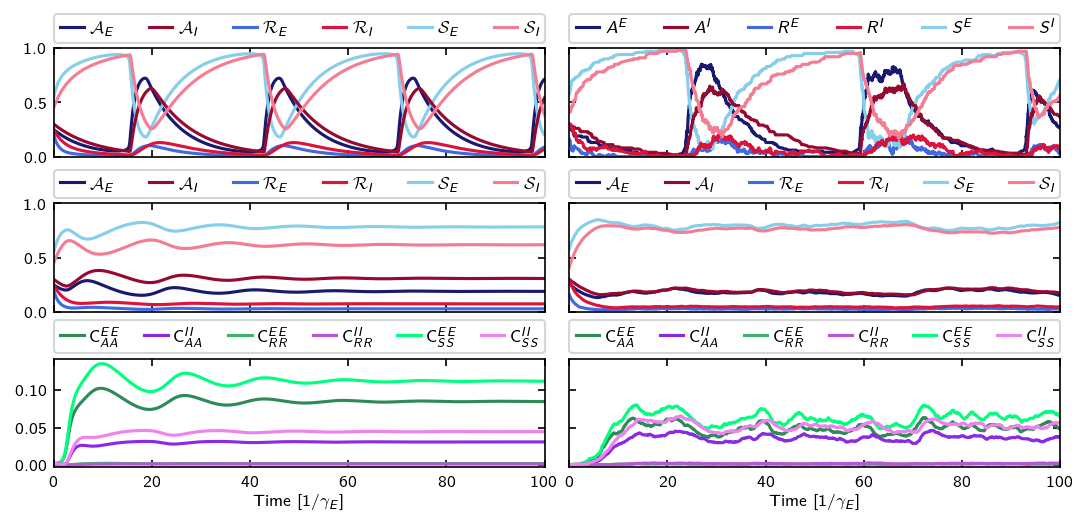

In [12]:
pn.draw()